In [5]:
import requests
import csv
import bs4
from bs4 import BeautifulSoup

In [6]:
listname = []
listscore = []
listprice = []
listaddr = []

In [7]:
for i in range(1, 51):
    url = 'http://www.dianping.com/shenzhen/ch10/g110p%s' % i
    r = requests.get(url, headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 '  
                      '(KHTML, like Gecko) Chrome/45.0.2454.101 Safari/537.36'})
    r.encoding = 'utf8'
    mypage = BeautifulSoup(r.text)
    
    mytitle = mypage.find_all('div', attrs = {'class':'tit'})
    for title in mytitle:
        name = title.find('h4')
        listname.append(name.text)
        
    myrating = mypage.find_all('span', attrs = {'class':'comment-list'})
    for rating in myrating:
        score = rating.find('b')
        listscore.append(score.text)
        
    myprice = mypage.find_all('a', attrs = {'class':'mean-price'})
    for price in myprice:
        cost = price.find('b')
        if cost is not None:
            price_str = cost.text
            price = price = int(price_str[1:])//10*10
            print(price)
            listprice.append(price)
        else:
            listprice.append('无')
    
    mylocation = mypage.find_all('a', attrs = {'data-click-name':'shop_tag_region_click'})
    for location in mylocation:
        place = location.find('span')
        listaddr.append(place.text)

        
print(listname)
print(listscore)
print(listprice)
print(listaddr)

/Users/cammi/venv/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))


110
140
90
90
70
140
80
150
110
400
120
80
130
130
90
90
120
80
90
400
130
120
120
80
130
110
90
90
80
80
100
120
110
90
110
80
100
90
110
110
110
110
150
120
100
110
90
100
80
80
100
110
110
120
80
120
110
110
210
80
70
100
90
120
110
110
100
120
120
30
90
100
130
120
80
100
120
140
140
90
80
120
90
110
70
30
100
80
80
120
80
120
610
80
110
100
130
80
90
90
100
130
70
110
100
90
100
100
120
90
190
120
90
90
80
120
60
90
70
110
110
190
140
60
80
140
100
110
110
90
60
120
90
90
80
100
110
80
120
70
80
80
120
110
140
70
70
90
90
120
80
100
70
130
210
80
80
130
90
90
90
140
400
80
100
60
80
180
80
140
100
110
100
50
100
110
90
110
90
70
110
80
80
60
80
110
80
100
90
70
70
70
100
20
70
60
110
80
120
120
110
80
100
110
80
90
70
90
90
80
110
60
120
140
100
90
150
90
100
70
140
80
80
90
140
130
130
70
90
90
80
90
70
90
90
100
80
60
1370
80
100
70
60
90
110
100
90
80
180
40
60
130
70
110
80
110
100
70
80
100
110
80
70
90
140
60
80
180
80
70
90
80
80
90
360
70
100
80
80
50
70
80
90
70
80
90
90


In [8]:
with open('HW2_data.csv','w') as f:
    writer = csv.writer(f)
    header = ['name','rating','price/person','region']
    writer.writerow(header)
    writer.writerows(zip(listname,listscore,listprice,listaddr))

In [5]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties 
from collections import Counter

In [6]:
df = pd.read_csv('homework2_codes.csv')

In [7]:
c = Counter()
df['region'].apply(lambda x: c.update(set(x.split("/"))))
c

Counter({'KKMAll 京基100大厦': 3,
         '上川自由路': 1,
         '上沙': 11,
         '下沙': 11,
         '东门商业圈': 27,
         '光明': 1,
         '八卦岭': 11,
         '公明': 2,
         '共乐城': 1,
         '前海': 6,
         '华侨城': 5,
         '华强北': 17,
         '华强南': 9,
         '南头': 32,
         '南山中心区': 10,
         '南山区': 6,
         '南油': 30,
         '南联': 3,
         '双龙': 3,
         '园岭': 11,
         '国贸': 21,
         '坂田': 17,
         '坪山': 2,
         '大浪': 1,
         '大运': 2,
         '大鹏': 1,
         '天虹汇一城': 3,
         '宝体': 1,
         '宝安中心区': 6,
         '宝安区': 1,
         '宝安南路沿线': 7,
         '宝安国际机场': 1,
         '宝立方': 1,
         '岗厦': 2,
         '市中心区': 34,
         '市民中心': 1,
         '布吉': 20,
         '布心': 2,
         '平湖': 2,
         '文锦渡': 7,
         '新安': 12,
         '新洲': 14,
         '时代城': 2,
         '景田': 8,
         '松岗': 1,
         '桃园': 8,
         '梅林': 31,
         '梅林关': 2,
         '横岗': 4,
         '欢乐海岸': 4,
         '民治': 29,
         '水库'

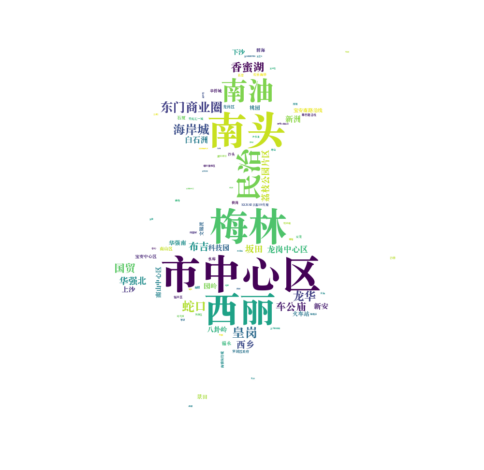

In [8]:
import wordcloud
from PIL import Image
import numpy as np

mask = np.array(Image.open('alice_mask.png'))

wc = wordcloud.WordCloud(background_color="white", max_words=2000, font_path='/Library/Fonts/Songti.ttc', mask=mask)
wc.generate_from_frequencies(c)
plt.figure(figsize=(8, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

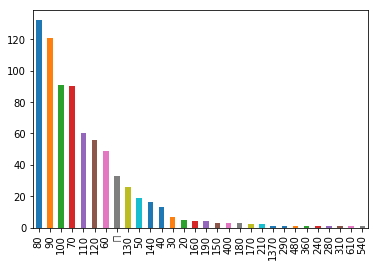

In [9]:
bar_chart = df['price/person'].value_counts().plot(kind='bar')

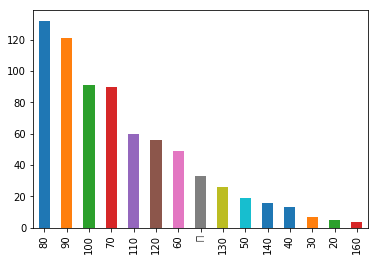

In [10]:
top_area_chart = df['price/person'].value_counts()[:15].plot(kind='bar')